In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [24]:
data = pd.read_csv("beer-servings.csv", index_col=False)

# Inspect Data

In [25]:
data.shape

(193, 7)

In [26]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


# Dropping columns

In [27]:
# Deleting "Unnamed:0" column because it is useless
data = data.iloc[:,1:] # iloc[rows,cols]
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


# Dropping Duplicate Rows

In [28]:
duplicate_rows = data.duplicated()
duplicate_rows

0      False
1      False
2      False
3      False
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Length: 193, dtype: bool

In [29]:
#count number of duplicate rows
duplicate_rows.sum()

0

In [30]:
# to delete any duplicate rows
data.drop_duplicates(inplace=True)

# OR
# data = data[~duplicate_rows]
# data

In [31]:
data.shape

(193, 6)

# Checking for missing values

In [32]:
data.isna()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
188,False,True,False,False,False,False
189,False,False,False,False,False,False
190,False,False,False,False,False,False
191,False,False,False,False,False,False


In [33]:
# count of missing values
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [36]:
# % of missing values
data.isna().sum()/data.shape[0]*100

country                         0.000000
beer_servings                   4.145078
spirit_servings                 4.145078
wine_servings                   3.108808
total_litres_of_pure_alcohol    0.518135
continent                       0.000000
dtype: float64

<Axes: >

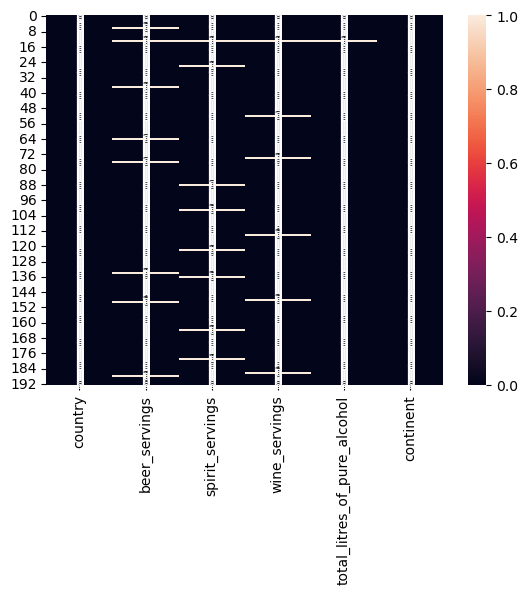

In [38]:
sns.heatmap(data.isna(), annot=True)

# Dropping rows with missing values

> NOT recommended, but if there is plenty of data and a few rows have missing values, it is fine

In [40]:
# data.dropna(inplace=True) 
# OR 
# data = data.dropna() # default inplace=False

In [ ]:
# Define in which columns to look for NA values
# data = data.dropna(subset=["beer_servings","wine_servings"])
# OR
# data.dropna(subset=["beer_servings","wine_servings"], inplace=True)

# Handling missing values

## Splitting numerical and categorical columns

In [50]:
num_df = data.select_dtypes(include="number")
cat_df = data.select_dtypes(include="object_")

In [49]:
num_df

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9
2,25.0,0.0,14.0,0.7
3,245.0,138.0,312.0,12.4
4,217.0,57.0,45.0,5.9
...,...,...,...,...
188,NaN,100.0,3.0,7.7
189,111.0,2.0,1.0,2.0
190,6.0,0.0,0.0,0.1
191,32.0,19.0,4.0,2.5


In [48]:
cat_df

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa
...,...,...
188,Venezuela,South America
189,Vietnam,Asia
190,Yemen,Asia
191,Zambia,Africa


In [43]:
print("Numerical columns are: ")
num_cols = num_df.columns.tolist()
print(num_cols)

print("\nCategorical columns are: ")
cat_cols = cat_df.columns.tolist()
print(cat_cols)

Numerical columns are: 
['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']

Categorical columns are: 
['country', 'continent']


# Check histogram of numerical columns for data imputation

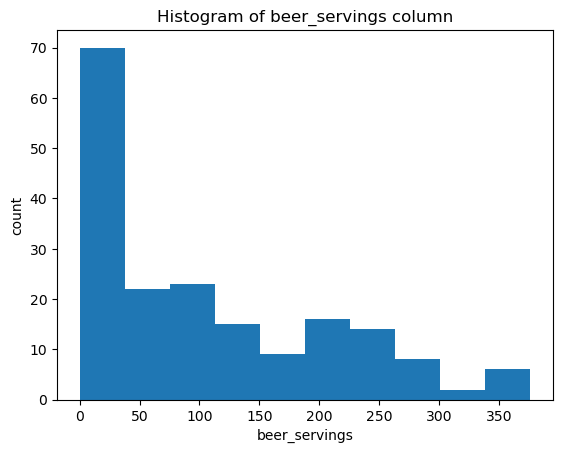

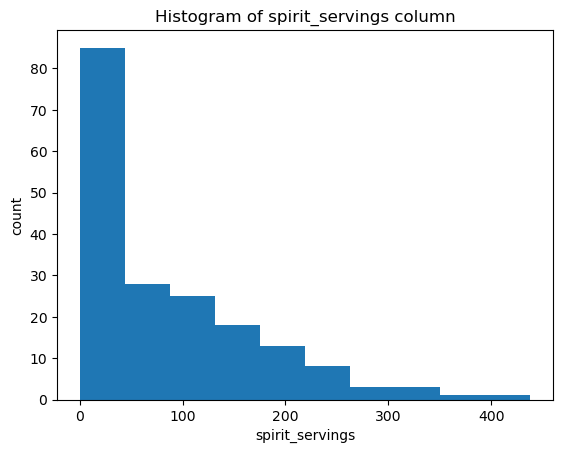

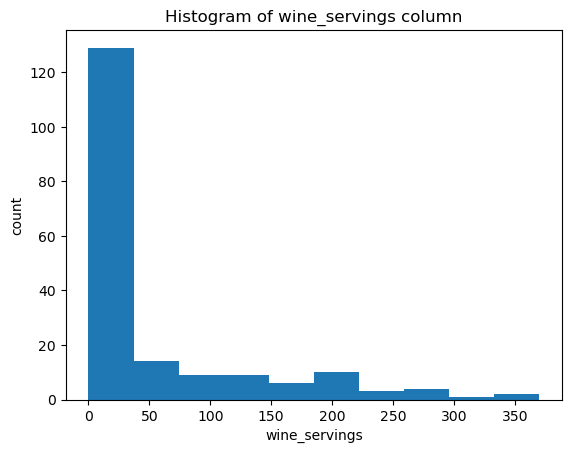

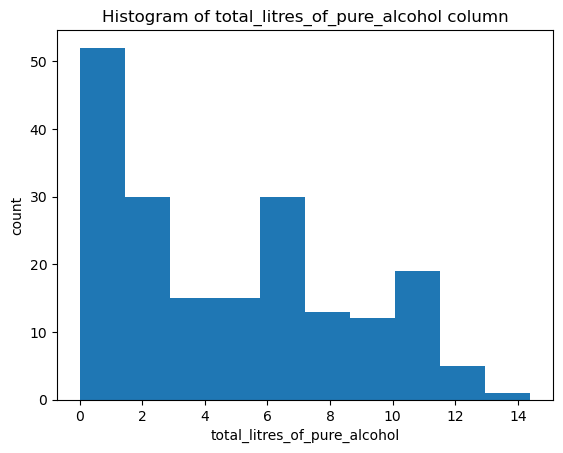

In [51]:
for col in num_cols:
    plt.hist(data[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

# Filling missing values for numerical columns

In [85]:
# for col in num_cols:
#     num_df[col] = num_df[col].fillna(num_df[col].median())
# num_df.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [53]:
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())

In [71]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

# Filling missing values for categorical columns

In [66]:
cat_df["continent"].mode()

0    Africa
Name: continent, dtype: object

In [68]:
cat_df["continent"].mode()[0]

'Africa'

In [69]:
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [72]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

# Recombine both numerical and categorical columns
This is done if the splitted dataframes were use to preprocess and clean

In [73]:
# data = pd.concat([num_df, cat_df], axis=1)

# Dropping duplicate columns

In [75]:
dup_cols = data.columns.duplicated()
dup_cols

array([False, False, False, False, False, False])

In [76]:
# data = = data.iloc[:,~dup_cols]

# Checking duplicates visually
Using correlation

<Axes: >

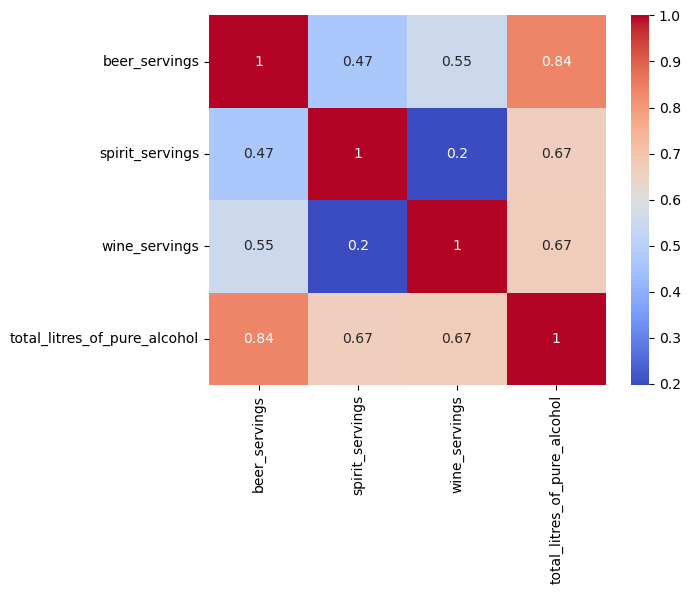

In [79]:
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')

# Outlier Handling

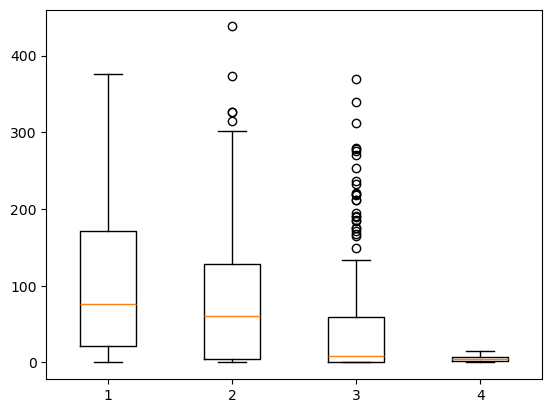

In [86]:
# Boxplot must be prodived a numerical ONLY df for accuracy
plt.boxplot(num_df)
plt.show()

In [87]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [89]:
for col in num_cols:
    data[col] = remove_outliers(data, col)

In [ ]:
# for col in num_cols:
#     num_df[col] = remove_outliers(num_df, col)

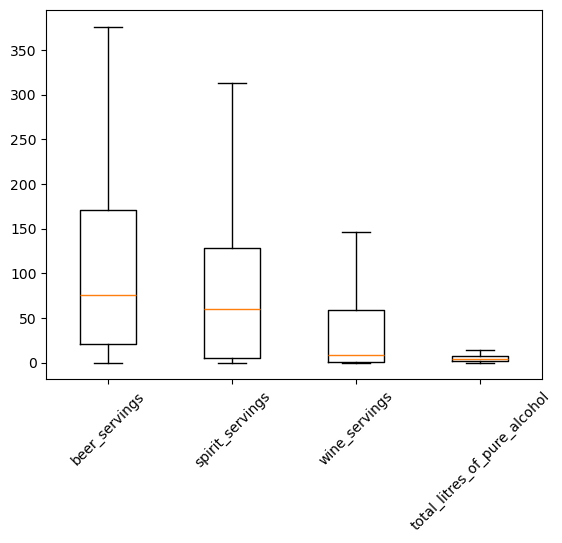

In [96]:
plt.boxplot(num_df)
plt.xticks([1, 2, 3, 4], num_cols, rotation=45)
plt.show()

<Axes: >

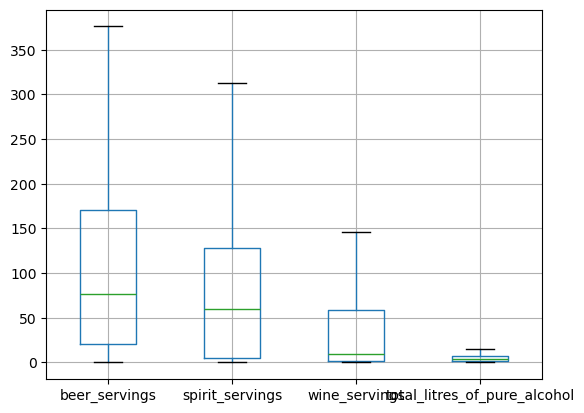

In [93]:
num_df.boxplot()

# Data imbalance

In [98]:
data["continent"].value_counts()

continent
Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: count, dtype: int64

In [99]:
# Plot class imbalance

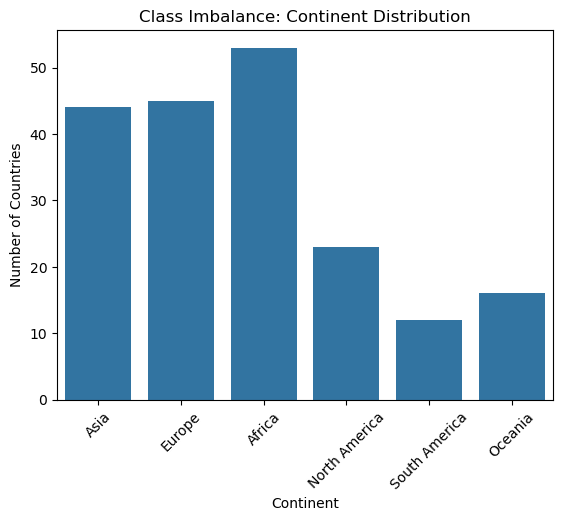

In [122]:
sns.countplot(x="continent", data=data)
plt.title('Class Imbalance: Continent Distribution')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45, ha="center") # ha = horizontal alignment
plt.show()

In [130]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X = data.drop('continent', axis=1) # feature
y = data['continent'] # label

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X,y)

# OR Undersampling
# undersampler = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = Undersampler.fit_resample(X,y)

continent
Asia             53
Europe           53
Africa           53
North America    53
South America    53
Oceania          53
Name: count, dtype: int64


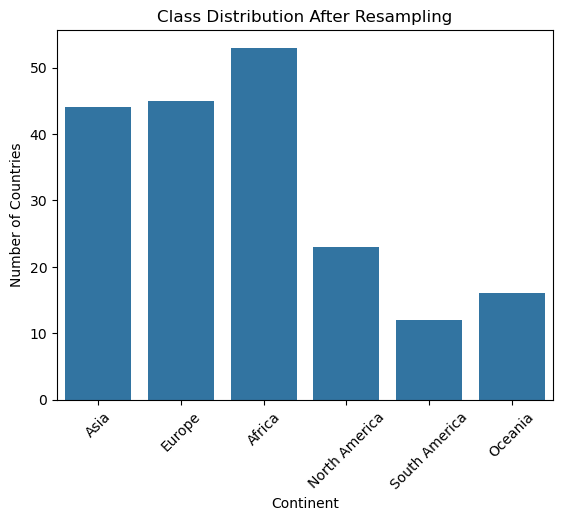

In [132]:
#create a new balanced df
balanced_data = pd.DataFrame(X_resampled,columns=X.columns)
balanced_data['continent'] = y_resampled

#check the class distribution after resampling
print(balanced_data['continent'].value_counts())

sns.countplot(x="continent", data=data)
plt.title('Class Distribution After Resampling')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45, ha="center") # ha = horizontal alignment
plt.show()

In [133]:
# Separate Features and Labels

In [134]:
y = data["wine_servings"] # Labels
X = data.drop("wine_servings", axis=1) # Features

In [135]:
#Test-Train Split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_states=2) # if we want the same split everytime

In [137]:
X_train

,country,beer_servings,spirit_servings,total_litres_of_pure_alcohol,continent
61,France,127.0,151.0,11.8,Europe
28,Cote d'Ivoire,37.0,1.0,4.0,Africa
187,Vanuatu,21.0,18.0,0.9,Oceania
120,Netherlands,251.0,88.0,9.4,Europe
30,Cambodia,57.0,65.0,2.2,Asia
...,...,...,...,...,...
162,Sudan,8.0,13.0,1.7,Africa
119,Nepal,5.0,6.0,0.2,Asia
135,Poland,343.0,215.0,10.9,Europe
39,Congo,76.0,1.0,1.7,Africa
